In [ ]:
import pandas as pd
import numpy as np

# gen random F1 dataset
np.random.seed(42)
n_samples = 150
engine_power = np.random.randint(1000, 1100, size=n_samples)
aero_efficiency = np.random.uniform(5, 10, size=n_samples)
tire_grip = np.random.uniform(69, 100, size=n_samples)
driver_skill = np.random.randint(75, 100, size=n_samples)

lap_time = (
    300 - 0.04 * engine_power - 3 * aero_efficiency - 0.5 * tire_grip + 0.2 * driver_skill
    + np.random.normal(0, 2, size=n_samples)
)

f1_data = pd.DataFrame({
    'Engine Power': engine_power,
    'Aerodynamics Efficiency': aero_efficiency,
    'Tire Grip': tire_grip,
    'Driver Skill': driver_skill,
    'Lap Time': lap_time
})

X = f1_data[['Engine Power', 'Aerodynamics Efficiency', 'Tire Grip', 'Driver Skill']]
y = f1_data['Lap Time']

f1_data.head()


,Engine Power,Aerodynamics Efficiency,Tire Grip,Driver Skill,Lap Time
0,1051,7.468978,97.777875,79,200.784685
1,1092,7.613664,82.273709,86,208.343368
2,1014,7.137705,98.966299,91,202.495944
3,1071,5.127096,98.872219,97,210.691093
4,1060,5.539457,95.443293,87,209.141717


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# ridge
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# lasso
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Linear Regression - MSE: {mse_lin}, R²: {r2_lin}")
print(f"Ridge Regression - MSE: {mse_ridge}, R²: {r2_ridge}")
print(f"Lasso Regression - MSE: {mse_lasso}, R²: {r2_lasso}")


Linear Regression - MSE: 3.035610664431866, R²: 0.9430718523079781
Ridge Regression - MSE: 2.984649723576038, R²: 0.9440275453425154
Lasso Regression - MSE: 3.463492018688283, R²: 0.9350476042661658


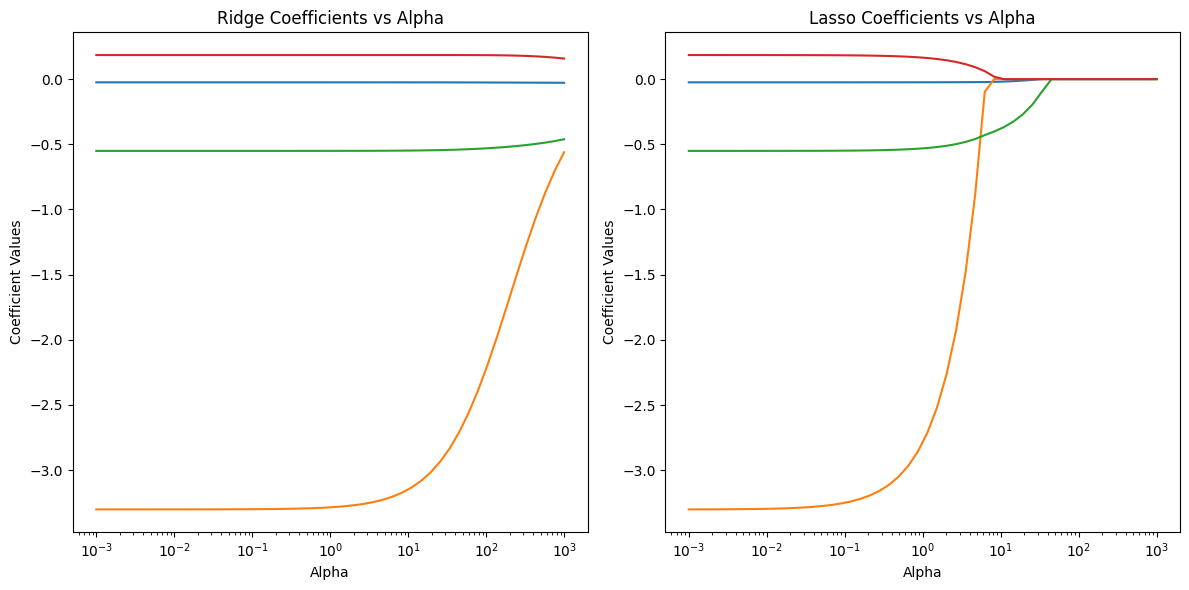

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, Lasso

alphas = np.logspace(-3, 3, 50)
ridge_coefs, lasso_coefs = [], []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.title("Ridge Coefficients vs Alpha")
plt.xlabel("Alpha")
plt.ylabel("Coefficient Values")

plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.title("Lasso Coefficients vs Alpha")
plt.xlabel("Alpha")
plt.ylabel("Coefficient Values")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

lin_reg_cv = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_reg_cv = cross_val_score(ridge_reg, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_reg_cv = cross_val_score(lasso_reg, X, y, cv=5, scoring='neg_mean_squared_error')

cv_mse_lin = -lin_reg_cv.mean()
cv_mse_ridge = -ridge_reg_cv.mean()
cv_mse_lasso = -lasso_reg_cv.mean()

print(f"Linear Regression - CV Mean Squared Error: {cv_mse_lin}")
print(f"Ridge Regression - CV Mean Squared Error: {cv_mse_ridge}")
print(f"Lasso Regression - CV Mean Squared Error: {cv_mse_lasso}")



Linear Regression - CV Mean Squared Error: 4.129702673504853
Ridge Regression - CV Mean Squared Error: 4.146062098062993
Lasso Regression - CV Mean Squared Error: 4.579920877193574
